A notebook to trace the as-built L2 throughput, starting with the source in Docushare, Document-17872, and displaying exactly what is used and how.


- S. Ritz updated 17 July 2018

In [53]:
import matplotlib.pyplot as plt
import datetime
import collections
import numpy as np
import argparse
import pandas as pd
from pandas import ExcelFile
from pandas import ExcelWriter
import os
import glob
import matplotlib.pyplot as plt
import scipy as sc
import scipy.signal
import textwrap
import pylab as pl

# this magic command makes plots appear within the notebook
%matplotlib inline

# avoid an annoying warning
plt.rcParams.update({'figure.max_open_warning': 0})

# define figure size parameters to make figures larger than default
figwidth=30
figheight=10


(0.85, 1.05)

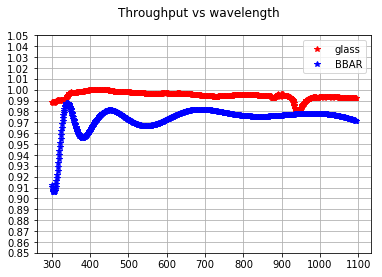

In [62]:
xl = pd.ExcelFile("Document-17872.xlsx")
#xl.sheet_names
df = xl.parse("Performance summary as-built")
#df['wavelength'], df['L2 glass']
df.drop(df.index[[0,1,2,3,4]])
#df['wavelength'][5:]
#df['L2 glass'][5:]
fig1=plt.figure()
plt.plot(df['wavelength'][5:800], df['L2 glass'][5:800], 'r*', label='glass')
plt.plot(df['wavelength'][5:800], df['L2 BBAR'][5:800], 'b*', label='BBAR')
plt.suptitle('Throughput vs wavelength')
ax=fig1.gca()
ax.grid(True)
ax.set_xticks(np.arange(300, 1200, 100.))
ax.set_yticks(np.arange(0., 2., 0.01))
pl.legend()
plt.ylim(0.85,1.05)



The current SE calculations want text files from 300 nm to 1100 nm in 1nm steps. Let's write that.

In [63]:
file1 = open("l2-glass.txt","w")
for i in range(len(df)):
    if ((df['wavelength'][i]>299.) & (df['wavelength'][i]<1101.)):
        print (round(df['wavelength'][i],1),round(df['L2 glass'][i],4))
        print (round(df['wavelength'][i],1),round(df['L2 glass'][i],4), file=file1)
file1.close()

300.0 0.9887
301.0 0.9886
302.0 0.9884
303.0 0.9883
304.0 0.9882
305.0 0.9881
306.0 0.9883
307.0 0.9886
308.0 0.9888
309.0 0.989
310.0 0.9893
311.0 0.9895
312.0 0.9897
313.0 0.99
314.0 0.9902
315.0 0.9905
316.0 0.9903
317.0 0.9902
318.0 0.9901
319.0 0.99
320.0 0.9899
321.0 0.99
322.0 0.9901
323.0 0.9902
324.0 0.9903
325.0 0.9905
326.0 0.9905
327.0 0.9905
328.0 0.9905
329.0 0.9905
330.0 0.9905
331.0 0.9906
332.0 0.9907
333.0 0.9908
334.0 0.9909
335.0 0.991
336.0 0.9916
337.0 0.9922
338.0 0.9928
339.0 0.9934
340.0 0.994
341.0 0.9945
342.0 0.995
343.0 0.9955
344.0 0.9959
345.0 0.9964
346.0 0.9967
347.0 0.9969
348.0 0.9971
349.0 0.9974
350.0 0.9976
351.0 0.9975
352.0 0.9974
353.0 0.9972
354.0 0.9971
355.0 0.997
356.0 0.997
357.0 0.997
358.0 0.997
359.0 0.997
360.0 0.997
361.0 0.9971
362.0 0.9972
363.0 0.9974
364.0 0.9975
365.0 0.9976
366.0 0.9977
367.0 0.9978
368.0 0.998
369.0 0.9981
370.0 0.9982
371.0 0.9981
372.0 0.998
373.0 0.9978
374.0 0.9977
375.0 0.9976
376.0 0.9977
377.0 0.9978
378.

In [64]:
file2 = open("l2-BBAR.txt","w")
for i in range(len(df)):
    if ((df['wavelength'][i]>299.) & (df['wavelength'][i]<1101.)):
        print (round(df['wavelength'][i],1),round(df['L2 BBAR'][i],4))
        print (round(df['wavelength'][i],1),round(df['L2 BBAR'][i],4), file=file2)
file2.close()

300.0 0.9123
301.0 0.9101
302.0 0.9079
303.0 0.9068
304.0 0.9056
305.0 0.9056
306.0 0.9055
307.0 0.9064
308.0 0.9072
309.0 0.909
310.0 0.9107
311.0 0.9132
312.0 0.9156
313.0 0.9186
314.0 0.9217
315.0 0.9251
316.0 0.9285
317.0 0.9322
318.0 0.9359
319.0 0.9397
320.0 0.9436
321.0 0.9474
322.0 0.9512
323.0 0.9548
324.0 0.9584
325.0 0.9618
326.0 0.9652
327.0 0.9683
328.0 0.9713
329.0 0.9739
330.0 0.9765
331.0 0.9786
332.0 0.9808
333.0 0.9824
334.0 0.984
335.0 0.9851
336.0 0.9862
337.0 0.9868
338.0 0.9874
339.0 0.9877
340.0 0.9879
341.0 0.9877
342.0 0.9875
343.0 0.9871
344.0 0.9866
345.0 0.9858
346.0 0.9851
347.0 0.9841
348.0 0.9832
349.0 0.9821
350.0 0.981
351.0 0.9797
352.0 0.9785
353.0 0.9772
354.0 0.9759
355.0 0.9746
356.0 0.9733
357.0 0.9721
358.0 0.9708
359.0 0.9696
360.0 0.9683
361.0 0.9672
362.0 0.966
363.0 0.965
364.0 0.9639
365.0 0.9629
366.0 0.962
367.0 0.9612
368.0 0.9604
369.0 0.9597
370.0 0.959
371.0 0.9584
372.0 0.9578
373.0 0.9574
374.0 0.957
375.0 0.9567
376.0 0.9564
377.0 0